<h1><strong><em>Importing the libraries

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from matplotlib.gridspec import GridSpec
from sklearn.svm import SVC

In [ ]:
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier as XGB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import multivariate_normal
import math
from sklearn import model_selection
import collections
import matplotlib as mpl
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
import seaborn as sns
from collections import Counter
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


<h1><strong><em>Importing the dataset

<h1><strong><em>Explanation of Columns in the dataset</strong></em></h1>

*   Age - age of the person in years
*   Sex - sex of the person (M: Male, F: Female)
*   ChestPainType - chest pain type (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)
* RestingBP: resting blood pressure (mm Hg)
* Cholesterol: serum cholesterol (mm/dl)
* FastingBS: fasting blood sugar (1: if FastingBS > 120 mg/dl, 0: otherwise)
* RestingECG: resting electrocardiogram results (Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria)
* MaxHR: maximum heart rate (Numeric value between 60 and 202)
* ExerciseAngina: exercise-induced angina (Y: Yes, N: No)
* Oldpeak: oldpeak = ST (Numeric value measured in depression)
* ST_Slope: the slope of the peak exercise ST segment (Up: upsloping, Flat: flat, Down: downsloping)
* HeartDisease: output class (1: heart disease, 0: Normal)






In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<h5>The dataset contains only non-null values so we do not need to preprocess the missing values<br>However the dtype of some columns need to be changed

In [ ]:
data['HeartDisease']=data['HeartDisease'].astype('category')
data['Sex']=data['Sex'].astype('category')
data['ChestPainType']=data['ChestPainType'].astype('category')
data['RestingECG']=data['RestingECG'].astype('category')
data['ExerciseAngina']=data['ExerciseAngina'].astype('category')
data['ST_Slope']=data['ST_Slope'].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             918 non-null    int64   
 1   Sex             918 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    int64   
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    category
dtypes: category(6), float64(1), int64(5)
memory usage: 49.4 KB


In [ ]:
numeric_list=['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']

In [ ]:
data.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
FastingBS,918.000000,0.233115,0.423046,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000


In [ ]:
data.describe(include=['category']).T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460
HeartDisease,918,2,1,508


<h1><strong><em>Exploratory Data Analysis

In [ ]:
df_copy=data.copy()
df_copy['HeartDisease']=df_copy['HeartDisease'].map({1:'HeartDisease',0:'No HeartDisease'})
df_copy['Sex']=df_copy['Sex'].map({'M':'Male','F':'Female'})
fig1=px.sunburst(df_copy,path=['HeartDisease','Sex'],color='HeartDisease',color_discrete_map={'HeartDisease':'#0e2756','No HeartDisease':'#0853c5','Male':'#95d3ff','Female':'#e1f9ff'},title='Sex',width=450)
fig1.update_traces(textinfo='label+percent parent',name='Sex')
fig1.update_layout()
fig1.show()


In [ ]:
fig2=px.sunburst(df_copy,path=['HeartDisease','ExerciseAngina'],color='HeartDisease',color_discrete_map={'HeartDisease':'#0e2756','No HeartDisease':'#0853c5','Y':'#95d3ff','N':'#e1f9ff'},title='ExerciseAngina',width=450)
fig2.update_traces(textinfo='label+percent parent',name='ExerciseAngina')
fig2.update_layout()
fig2.show()

In [ ]:
df_copy['FastingBS']=df_copy['FastingBS'].astype('category')
fig3=px.sunburst(df_copy,path=['HeartDisease','FastingBS'],color='HeartDisease',color_discrete_map={'HeartDisease':'#0e2756','No HeartDisease':'#0853c5','0':'#95d3ff','1':'#e1f9ff'},title='FastingBS',width=450)
fig3.update_traces(textinfo='label+percent parent',name='FastingBS')
fig3.update_layout()
fig3.show()

In [ ]:
fig4=px.histogram(df_copy,color='ST_Slope',x='HeartDisease',barmode='group',color_discrete_map={'Up':'#0e2756','Flat':'#0853c5','Down':'#088cff'},opacity=0.8,height=500,width=500,title='Heart Disease vs ST_Slope')
fig4.update_traces()
fig4.show()

In [ ]:
fig5=px.histogram(df_copy,color='HeartDisease',x='ChestPainType',barmode='group',color_discrete_map={'HeartDisease':'#0e2756','No HeartDisease':'#0853c5'},opacity=0.8,height=500,width=700,title='Chest Pain Type vs Heart Disease')
fig5.show()

In [ ]:
fig6=px.histogram(df_copy,color='RestingECG',x='HeartDisease',barmode='group',color_discrete_map={'Normal':'#0e2756','ST':'#0853c5','LVH':'#088cff'},opacity=0.8,width=500,height=500,title='Heart Disease vs RestingECG')
fig6.show()

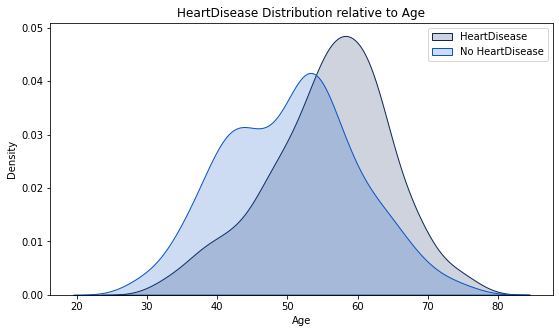

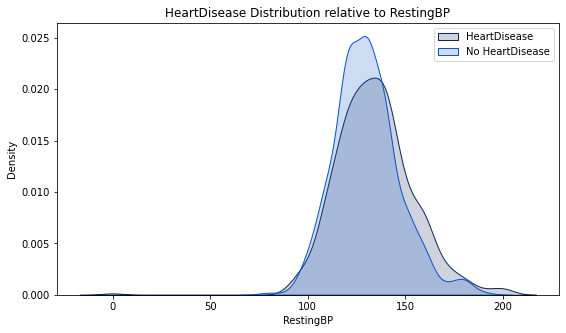

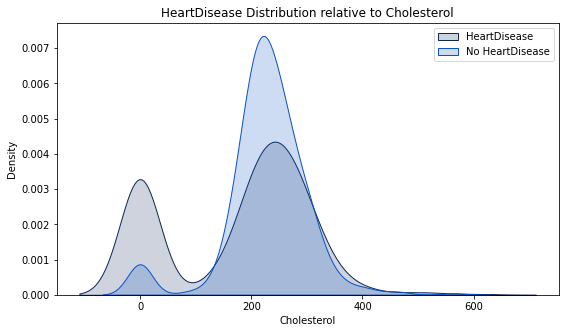

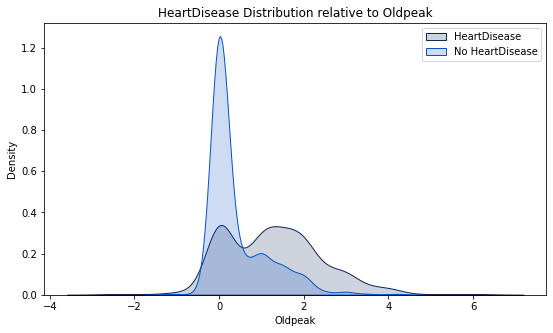

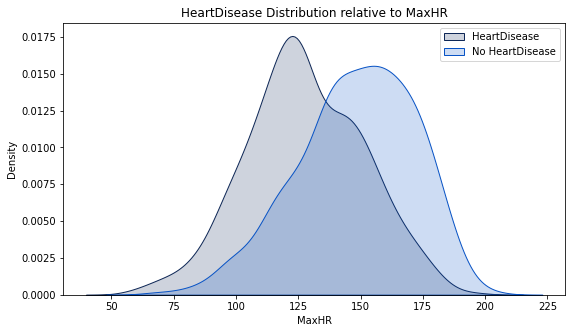

In [ ]:
fig,ax=plt.subplots(figsize=(9,5))
sns.kdeplot(df_copy[df_copy['HeartDisease']=='HeartDisease']['Age'],shade=True,alpha=0.2,color='#0e2756',ax=ax,label='HeartDisease')
sns.kdeplot(df_copy[df_copy['HeartDisease']=='No HeartDisease']['Age'],shade=True,alpha=0.2,color='#0853c5',ax=ax,label='No HeartDisease')
plt.title('HeartDisease Distribution relative to Age')
plt.legend()
plt.show()
fig,ax=plt.subplots(figsize=(9,5))
sns.kdeplot(df_copy[df_copy['HeartDisease']=='HeartDisease']['RestingBP'],shade=True,alpha=0.2,color='#0e2756',ax=ax,label='HeartDisease')
sns.kdeplot(df_copy[df_copy['HeartDisease']=='No HeartDisease']['RestingBP'],shade=True,alpha=0.2,color='#0853c5',ax=ax,label='No HeartDisease')
plt.title('HeartDisease Distribution relative to RestingBP')
plt.legend()
plt.show()
fig,ax=plt.subplots(figsize=(9,5))
sns.kdeplot(df_copy[df_copy['HeartDisease']=='HeartDisease']['Cholesterol'],shade=True,alpha=0.2,color='#0e2756',ax=ax,label='HeartDisease')
sns.kdeplot(df_copy[df_copy['HeartDisease']=='No HeartDisease']['Cholesterol'],shade=True,alpha=0.2,color='#0853c5',ax=ax,label='No HeartDisease')
plt.title('HeartDisease Distribution relative to Cholesterol')
plt.legend()
plt.show()
fig,ax=plt.subplots(figsize=(9,5))
sns.kdeplot(df_copy[df_copy['HeartDisease']=='HeartDisease']['Oldpeak'],shade=True,alpha=0.2,color='#0e2756',ax=ax,label='HeartDisease')
sns.kdeplot(df_copy[df_copy['HeartDisease']=='No HeartDisease']['Oldpeak'],shade=True,alpha=0.2,color='#0853c5',ax=ax,label='No HeartDisease')
plt.title('HeartDisease Distribution relative to Oldpeak')
plt.legend()
plt.show()
fig,ax=plt.subplots(figsize=(9,5))
sns.kdeplot(df_copy[df_copy['HeartDisease']=='HeartDisease']['MaxHR'],shade=True,alpha=0.2,color='#0e2756',ax=ax,label='HeartDisease')
sns.kdeplot(df_copy[df_copy['HeartDisease']=='No HeartDisease']['MaxHR'],shade=True,alpha=0.2,color='#0853c5',ax=ax,label='No HeartDisease')
plt.title('HeartDisease Distribution relative to MaxHR')
plt.legend()
plt.show()

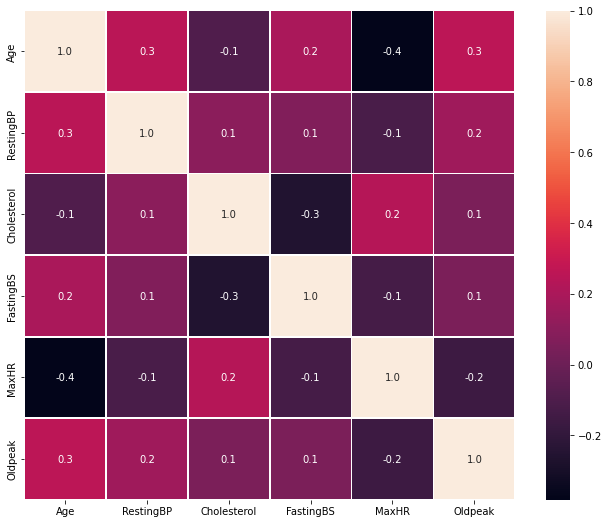

In [ ]:
plt.figure(figsize = (11,9))
sns.heatmap(data.loc[:,numeric_list].corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()

<h1><strong><em>Identifying the outliers using Box Plot Analysis

In [ ]:
fig7=px.histogram(df_copy['Cholesterol'],marginal='box',color_discrete_map={'Cholesterol':'#0e2756'},opacity=0.8,height=450,width=700)
fig7.show()
fig7=px.histogram(df_copy['Age'],marginal='box',color_discrete_map={'Age':'#0853c5'},opacity=0.8,height=450,width=700)
fig7.show()
fig7=px.histogram(df_copy['RestingBP'],marginal='box',color_discrete_map={'RestingBP':'#0e2756'},opacity=0.8,height=450,width=700)
fig7.show()
fig7=px.histogram(df_copy['MaxHR'],marginal='box',color_discrete_map={'MaxHR':'#0853c5'},opacity=0.8,height=450,width=700)
fig7.show()
fig7=px.histogram(df_copy['Oldpeak'],marginal='box',color_discrete_map={'Oldpeak':'#0e2756'},opacity=0.8,height=450,width=700)
fig7.show()

<h1><strong><em>Removing the outliers

In [ ]:
data=data[data.Cholesterol!=0]
data=data[data.RestingBP>80]
data.shape

(746, 12)

In [ ]:
fig7=px.histogram(data['RestingBP'],marginal='box',color_discrete_map={'RestingBP':'#0e2756'},opacity=0.8,height=450,width=700)
fig7.show()
fig7=px.histogram(data['Cholesterol'],marginal='box',color_discrete_map={'Cholesterol':'#0e2756'},opacity=0.8,height=450,width=700)
fig7.show()

In [ ]:
data.to_csv('datasetaftereda.csv')

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/heart.csv')

In [ ]:
eda_data=pd.read_csv('/content/datasetaftereda.csv')
eda_data.drop(eda_data.columns[0],axis=1,inplace=True)

In [ ]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
eda_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
741,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
742,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
743,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
744,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


<h1><strong><em>Encoding

In [ ]:
lst2=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
eda_data[lst2] = eda_data[lst2].apply(LabelEncoder().fit_transform)
data[lst2]=data[lst2].apply(LabelEncoder().fit_transform)

In [ ]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [ ]:
X_eda=eda_data.iloc[:,:-1]
Y_eda=eda_data.iloc[:,-1]

<h1><strong><em>Scaling

In [ ]:
ss=StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
X_train_eda, X_test_eda, y_train_eda, y_test_eda = train_test_split(X_eda, Y_eda, test_size = 0.3, random_state = 0)
X_train_eda = ss.fit_transform(X_train_eda)
X_test_eda = ss.transform(X_test_eda)

<h1><strong><em> Implementing Various Models

#Random Forest Classifier

In [ ]:
params_1={
 "max_depth"        : [2,3,4,5,6,7,8,9,10,11,12],
 "n_estimators"     :[100,200,300,400,500,600,700,800,900,1000],
 "min_samples_split":[2,3,4,5,6,7,8],
 "min_samples_leaf":[1,2,3,4,5,6,7]
}

In [ ]:
classifier=RandomForestClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params_1,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search.best_estimator_

RandomForestClassifier(max_depth=7, min_samples_leaf=6, min_samples_split=6,
                       n_estimators=600)

In [ ]:
rfc = RandomForestClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=1000)
rfc.fit(X_train,y_train)
y_pred_rf = rfc.predict_proba(X_test)
acc_1= roc_auc_score(y_test,y_pred_rf[:,1])
acc_1

0.9262174928063412

In [ ]:
rfc_eda = RandomForestClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=1000)
rfc_eda.fit(X_train_eda,y_train_eda)
y_predi_rf = rfc_eda.predict_proba(X_test_eda)
acc_2= roc_auc_score(y_test_eda,y_predi_rf[:,1])
acc_2

0.9418103448275863

#KNeighbors Classifier

In [ ]:
params_2={
 "n_neighbors"        : [2,3,4,5,6,7,8,9,10],
 "weights"     :['uniform','distance','callable'],
 "leaf_size":[2,3,4,5,6,7,8],
 "p":[1,2,3]
}

In [ ]:
classifier=KNeighborsClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params_2,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'leaf_size': [2, 3, 4, 5, 6, 7, 8],
                                        'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9,
                                                        10],
                                        'p': [1, 2, 3],
                                        'weights': ['uniform', 'distance',
                                                    'callable']},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search.best_estimator_

KNeighborsClassifier(leaf_size=3, n_neighbors=9, p=1)

In [ ]:
knn = KNeighborsClassifier(leaf_size=3, n_neighbors=10, p=1, weights='distance')
knn.fit(X_train,y_train)
y_pred_knn = knn.predict_proba(X_test)
acc_3 = roc_auc_score(y_test,y_pred_knn[:,1])
acc_3

0.9219284434551279

In [ ]:
knn_eda = KNeighborsClassifier(leaf_size=3, n_neighbors=10, p=1, weights='distance')
knn_eda.fit(X_train_eda,y_train_eda)
y_predi_knn = knn_eda.predict_proba(X_test_eda)
acc3 = roc_auc_score(y_test_eda,y_predi_knn[:,1])
acc3

0.9264048531289911

*italicized text*#Gradient Boosting Classifier

In [ ]:
params_3={
 "n_estimators"        : [190,200,210,220,230],
 "learning_rate"     :[0.019,0.02,0.024,0.025,0.028],
 "max_depth": [2,3,5,4]
}

In [ ]:
classifier=GradientBoostingClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params_3,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.019, 0.02, 0.024,
                                                          0.025, 0.028],
                                        'max_depth': [2, 3, 5, 4],
                                        'n_estimators': [190, 200, 210, 220,
                                                         230]},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search.best_estimator_

GradientBoostingClassifier(learning_rate=0.019, n_estimators=200)

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=190, learning_rate=0.019,max_depth=4,random_state=41)
gbc.fit(X_train, y_train)
y_pred4 = gbc.predict_proba(X_test)
acc_4 = roc_auc_score(y_test,y_pred4[:,1])
acc_4

0.9212226505239156

In [ ]:
gbc_eda = GradientBoostingClassifier(n_estimators=200, learning_rate=0.02,max_depth=2,random_state=41)
gbc_eda.fit(X_train_eda,y_train_eda)
y_pred5 = gbc_eda.predict_proba(X_test_eda)
acc5 = roc_auc_score(y_test_eda,y_pred5[:,1])
acc5

0.935344827586207

#Gaussian Naive Bayes

In [ ]:
gnb = GaussianNB()
#m7 = MultinomialNB()
#m8 = BernoulliNB()
gnb.fit(X_train, y_train)
#m7.fit(X_train, y_train)
#m8.fit(X_train, y_train)
y_pred6 = gnb.predict_proba(X_test)
#y_pred7 = m7.predict_proba(X_test)
#y_pred8 = m8.predict_proba(X_test)
acc_6 = roc_auc_score(y_test,y_pred6[:,1])
#acc7 = roc_auc_score(y_test,y_pred7[:,1])
#acc8 = roc_auc_score(y_test,y_pred8[:,1])
acc_6

0.9152505564905804

In [ ]:
gnb_eda = GaussianNB()
gnb_eda.fit(X_train_eda, y_train_eda)
y_pred7 = gnb_eda.predict_proba(X_test_eda)
acc_7 = roc_auc_score(y_test_eda,y_pred7[:,1])
acc_7

0.9458812260536398

#XGBoost

In [ ]:
z=list(y_train).count(0)
o=list(y_train).count(1)

In [ ]:
acc_lst=[]
for i in range(1,11):
  model=XGB(learning_rate=0.1+0.01*i,n_estimators=100*i,max_depth=i,scale_pos_weight=z/o,gamma=i,subsample=0.1*i)
  model.fit(X_train,y_train)
  y_pred=model.predict_proba(X_test)
  accuracy=roc_auc_score(y_test,y_pred[:,1])
  acc_lst.append(accuracy)

In [ ]:
acc_lst

[0.9054237472175471,
 0.9256745751669472,
 0.9217112763993701,
 0.924860198707856,
 0.9237743634290677,
 0.9349041750366469,
 0.9312937727346763,
 0.9295021445246756,
 0.9228785493240675,
 0.9137303871002769]

In [ ]:
params_4={
 "learning_rate"    : [0.13,0.14,0.15,0.16,0.17],
 "max_depth"        : [2,3,4,5,6,7,8],
 "n_estimators"     :[600,620,640,650,580,560],
 "scale_pos_weight" :[z/o],
 "gamma"            :[5,6,7,8,9,10],
 "subsample"        :[0.6,0.7,0.8,0.9],
}

In [ ]:
classifier=XGB()
random_search=RandomizedSearchCV(classifier,param_distributions=params_4,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'gamma': [5, 6, 7, 8, 9, 10],
                                        'learning_rate': [0.13, 0.14, 0.15,
                                                          0.16, 0.17],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'n_estimators': [600, 620, 640, 650,
                                                         580, 560],
                                        'scale_pos_weight': [0.8608695652173913],
                                        'subsample': [0.6, 0.7, 0.8, 0.9]},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search.best_estimator_

XGBClassifier(gamma=5, learning_rate=0.16, max_depth=8, n_estimators=560,
              scale_pos_weight=0.8608695652173913, subsample=0.8)

In [ ]:
xgb=XGB(gamma=6, learning_rate=0.14, max_depth=8, n_estimators=620,
              scale_pos_weight=0.8608695652173913, subsample=0.6)
xgb.fit(X_train,y_train)
y_pred8=xgb.predict_proba(X_test)
acc8=roc_auc_score(y_test,y_pred8[:,1])
acc8

0.9350670503284652

In [ ]:
xgb_eda=XGB(gamma=6, learning_rate=0.14, max_depth=8, n_estimators=620,
              scale_pos_weight=0.8608695652173913, subsample=0.6)
xgb_eda.fit(X_train_eda,y_train_eda)
y_pred9=xgb_eda.predict_proba(X_test_eda)
acc9=roc_auc_score(y_test_eda,y_pred9[:,1])
acc9

0.9456417624521073

#Neural Network

6/6 [==============================] - 0s 2ms/step - loss: 0.3335 - accuracy: 0.8804
Neural Network score    ========>>> 0.88


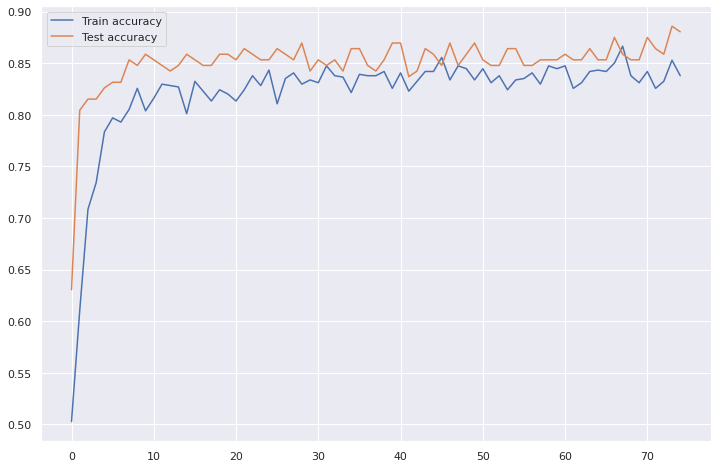

In [ ]:
def neural_net_results(X, y):
    y = keras.utils.to_categorical(y, 2)
    X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2,random_state=2)
    X_train1 = keras.utils.normalize(X_train,axis=1)
    X_val1 = keras.utils.normalize(X_val,axis=1)
    scaler = StandardScaler()
    X_train[numeric_list] = scaler.fit_transform(X_train1[numeric_list])
    X_val[numeric_list] = scaler.transform(X_val1[numeric_list])
    model = keras.Sequential([
        keras.layers.Flatten(input_dim=X_train.shape[1]),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation='sigmoid'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(2, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(X_train, y_train,
              batch_size=10, epochs=75,
              validation_data=(X_val, y_val),
              verbose=0)

    score = np.round(model.evaluate(X_val, y_val, verbose=1)[1], 3)
    print(f'Neural Network score    ========>>> {score}')

    history_plot(history)

    return score


def history_plot(history):

    fig = plt.figure(figsize=(12, 8))
    plt.plot(history.history['accuracy'], label="Train accuracy")
    plt.plot(history.history['val_accuracy'], label="Test accuracy")
    plt.legend()


def plot_nn_model(model):
    plot_model(model, show_shapes=True)

x = neural_net_results(X, Y)



In [ ]:
numeric_list=['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']
categorical_list=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope','HeartDisease']

In [ ]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [ ]:
def build_clf():
  # creating the layers of the NN
  ann = tf.keras.models.Sequential()
  ann.add(tf.keras.layers.Dense(32,activation='relu'))
  tf.keras.layers.Dropout(0.1)
  ann.add(tf.keras.layers.Dense(32,activation='relu'))
  tf.keras.layers.Dropout(0.3)
  ann.add(tf.keras.layers.Dense(2, activation='sigmoid'))
  tf.keras.layers.Dropout(0.3)
  ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return ann

model=KerasClassifier(build_fn=build_clf)

params={'batch_size':[10, 20, 50, 25, 32],
        'nb_epoch':[75,100,200, 300, 400],

        }
gs=GridSearchCV(estimator=model, param_grid=params, cv=5)
# now fit the dataset to the GridSearchCV object.
gs = gs.fit(X, Y)


37/37 [==============================] - 1s 2ms/step - loss: 7.9562 - accuracy: 0.5882


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [ ]:
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('LR', LogisticRegression(random_state=42))])
pipe_dt = Pipeline([('scl', StandardScaler()),
                    ('DT',DecisionTreeClassifier(random_state=42))])
pipe_rf = Pipeline([('scl', StandardScaler()),
                    ('RF',RandomForestClassifier(random_state=42))])
pipe_knn = Pipeline([('scl', StandardScaler()),
                    ('KNN', KNeighborsClassifier())])
pipe_svm = Pipeline([('scl', StandardScaler()),
                     ('SVM', svm.SVC(random_state=42))])
pipe_xgb = Pipeline([('scl', StandardScaler()),
                     ('XGB', XGB(random_state=42))])
pipe_gnb = Pipeline([('scl', StandardScaler()),
                     ('GNB', GaussianNB())])

In [ ]:
param_range = [2,3,4,5,6,7,8,9,10]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50,100,150]
learning_rates = [.1,.2,.3]
lr_param_grid = [{'LR__penalty': ['l1', 'l2'],
                   'LR__C': param_range_fl,
                   'LR__solver': ['liblinear']}]
dt_param_grid = [{'DT__criterion': ['gini', 'entropy'],
                   'DT__min_samples_leaf': param_range,
                   'DT__max_depth': param_range,
                   'DT__min_samples_split': param_range[1:]}]
rf_param_grid = [{'RF__min_samples_leaf': param_range,
                   'RF__max_depth': param_range,
                   'RF__min_samples_split': param_range[1:]}]
knn_param_grid = [{'KNN__n_neighbors': param_range,
                   #'KNN__weights': ['uniform', 'distance','callable'],
                   'KNN__leaf_size':[2,3,4,5,6,7,8],
                   'KNN__p':[1,2,3],
                   #'KNN__metric': ['euclidean', 'manhattan']
                   }
                   ]
svm_param_grid = [{'SVM__kernel': ['linear', 'rbf'],
                    'SVM__C': param_range}]
xgb_param_grid = [{'XGB__learning_rate': [0.019,0.02,0.024,0.025,0.028],
                    'XGB__max_depth': [2,3,5,4],
                    'XGB__min_child_weight': param_range[:2],
                    'XGB__subsample': param_range_fl,
                    'XGB__n_estimators': [190,200,210,220,230]}]


In [ ]:
pipe_knn.get_params()

{'KNN': KNeighborsClassifier(),
 'KNN__algorithm': 'auto',
 'KNN__leaf_size': 30,
 'KNN__metric': 'minkowski',
 'KNN__metric_params': None,
 'KNN__n_jobs': None,
 'KNN__n_neighbors': 5,
 'KNN__p': 2,
 'KNN__weights': 'uniform',
 'memory': None,
 'scl': StandardScaler(),
 'scl__copy': True,
 'scl__with_mean': True,
 'scl__with_std': True,
 'steps': [('scl', StandardScaler()), ('KNN', KNeighborsClassifier())],
 'verbose': False}

In [ ]:
lr_grid_search = RandomizedSearchCV(estimator=pipe_lr,
        param_distributions=lr_param_grid,
        scoring='accuracy',
        cv=3)
dt_grid_search = RandomizedSearchCV(estimator=pipe_dt,
        param_distributions=dt_param_grid,
        scoring='accuracy',
        cv=3)
rf_grid_search = RandomizedSearchCV(estimator=pipe_rf,
        param_distributions=rf_param_grid,
        scoring='accuracy',
        cv=3)
knn_grid_search = RandomizedSearchCV(estimator=pipe_knn,
        param_distributions=knn_param_grid,
        scoring='accuracy',
        cv=3)
svm_grid_search = RandomizedSearchCV(estimator=pipe_svm,
        param_distributions=svm_param_grid,
        scoring='accuracy',
        cv=3)
xgb_grid_search = RandomizedSearchCV(estimator=pipe_xgb,
        param_distributions=xgb_param_grid,
        scoring='accuracy',
        cv=3)


In [ ]:
grids = [lr_grid_search, dt_grid_search, rf_grid_search, knn_grid_search, svm_grid_search, xgb_grid_search]
for pipe in grids:
    pipe.fit(X_train,y_train)


In [ ]:
grid_dict = {0: 'Logistic Regression', 1: 'Decision Trees',
             2: 'Random Forest', 3: 'K-Nearest Neighbors',
             4: 'Support Vector Machines', 5: 'XGBoost'}
for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i],
    model.score(X_test,y_test)))
    print('{} Best Params: {}'.format(grid_dict[i],          model.best_params_))


Logistic Regression Test Accuracy: 0.8405797101449275
Logistic Regression Best Params: {'LR__solver': 'liblinear', 'LR__penalty': 'l1', 'LR__C': 1.0}
Decision Trees Test Accuracy: 0.8115942028985508
Decision Trees Best Params: {'DT__min_samples_split': 7, 'DT__min_samples_leaf': 9, 'DT__max_depth': 3, 'DT__criterion': 'gini'}
Random Forest Test Accuracy: 0.8514492753623188
Random Forest Best Params: {'RF__min_samples_split': 10, 'RF__min_samples_leaf': 8, 'RF__max_depth': 10}
K-Nearest Neighbors Test Accuracy: 0.8659420289855072
K-Nearest Neighbors Best Params: {'KNN__p': 1, 'KNN__n_neighbors': 9, 'KNN__leaf_size': 8}
Support Vector Machines Test Accuracy: 0.855072463768116
Support Vector Machines Best Params: {'SVM__kernel': 'rbf', 'SVM__C': 3}
XGBoost Test Accuracy: 0.8514492753623188
XGBoost Best Params: {'XGB__subsample': 0.5, 'XGB__n_estimators': 220, 'XGB__min_child_weight': 2, 'XGB__max_depth': 3, 'XGB__learning_rate': 0.02}


In [ ]:
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.535 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.543 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.539 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.539 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.547 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.868 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.860 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.891 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.828 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.828 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.814 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [ ]:
grid_predictions = grid.predict(X_test)

# print classification report
acc=accuracy_score(y_test, grid_predictions)


In [ ]:
print(acc)

0.8659420289855072


In [ ]:
df=data.copy()

In [ ]:
X_df=df.loc[:, df.columns != 'HeartDisease']

In [ ]:
y_df=df.loc[:,df.columns=='HeartDisease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.25, random_state=41)

#Classification Report

In [ ]:
from sklearn.metrics import classification_report
def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
  dfs = []
  models = [
          ('RandomForest', rfc),
          ('KNN', knn),
          ('GNB', gnb),
          ('XGB', xgb)
        ]
  results = []
  names = []
  scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
  target_names = ['Heart Failure', 'Heart Success']
  for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
  final = pd.concat(dfs, ignore_index=True)
  return final

In [ ]:
final=run_exps(X_train , y_train, X_test, y_test)

RandomForest
               precision    recall  f1-score   support

Heart Failure       0.87      0.82      0.84       103
Heart Success       0.86      0.90      0.88       127

     accuracy                           0.86       230
    macro avg       0.86      0.86      0.86       230
 weighted avg       0.86      0.86      0.86       230

KNN
               precision    recall  f1-score   support

Heart Failure       0.72      0.68      0.70       103
Heart Success       0.75      0.79      0.77       127

     accuracy                           0.74       230
    macro avg       0.74      0.73      0.73       230
 weighted avg       0.74      0.74      0.74       230

GNB
               precision    recall  f1-score   support

Heart Failure       0.84      0.84      0.84       103
Heart Success       0.87      0.87      0.87       127

     accuracy                           0.86       230
    macro avg       0.86      0.86      0.86       230
 weighted avg       0.86      0.86  

In [ ]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)

bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

In [ ]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.std, np.mean])

test_accuracy           test_roc_auc            \
                       std      mean          std      mean   
model                                                         
GNB               0.027697  0.850122     0.012647  0.907212   
KNN               0.037703  0.722926     0.045339  0.779163   
RandomForest      0.042665  0.856040     0.021960  0.924616   
XGB               0.052065  0.861601     0.017811  0.926708   

             test_recall_weighted           test_f1_weighted            \
                              std      mean              std      mean   
model                                                                    
GNB                      0.027697  0.850122         0.027632  0.850122   
KNN                      0.037703  0.722926         0.037557  0.723381   
RandomForest             0.042665  0.856040         0.042555  0.855462   
XGB                      0.052065  0.861601         0.051773  0.861409   

             test_precision_weighted            
                                 std      mean  
model                                           
GNB                         0.027128  0.851032  
KNN                         0.037079  0.725380  
RandomForest                0.043175  0.857913  
XGB                         0.050583  0.863105

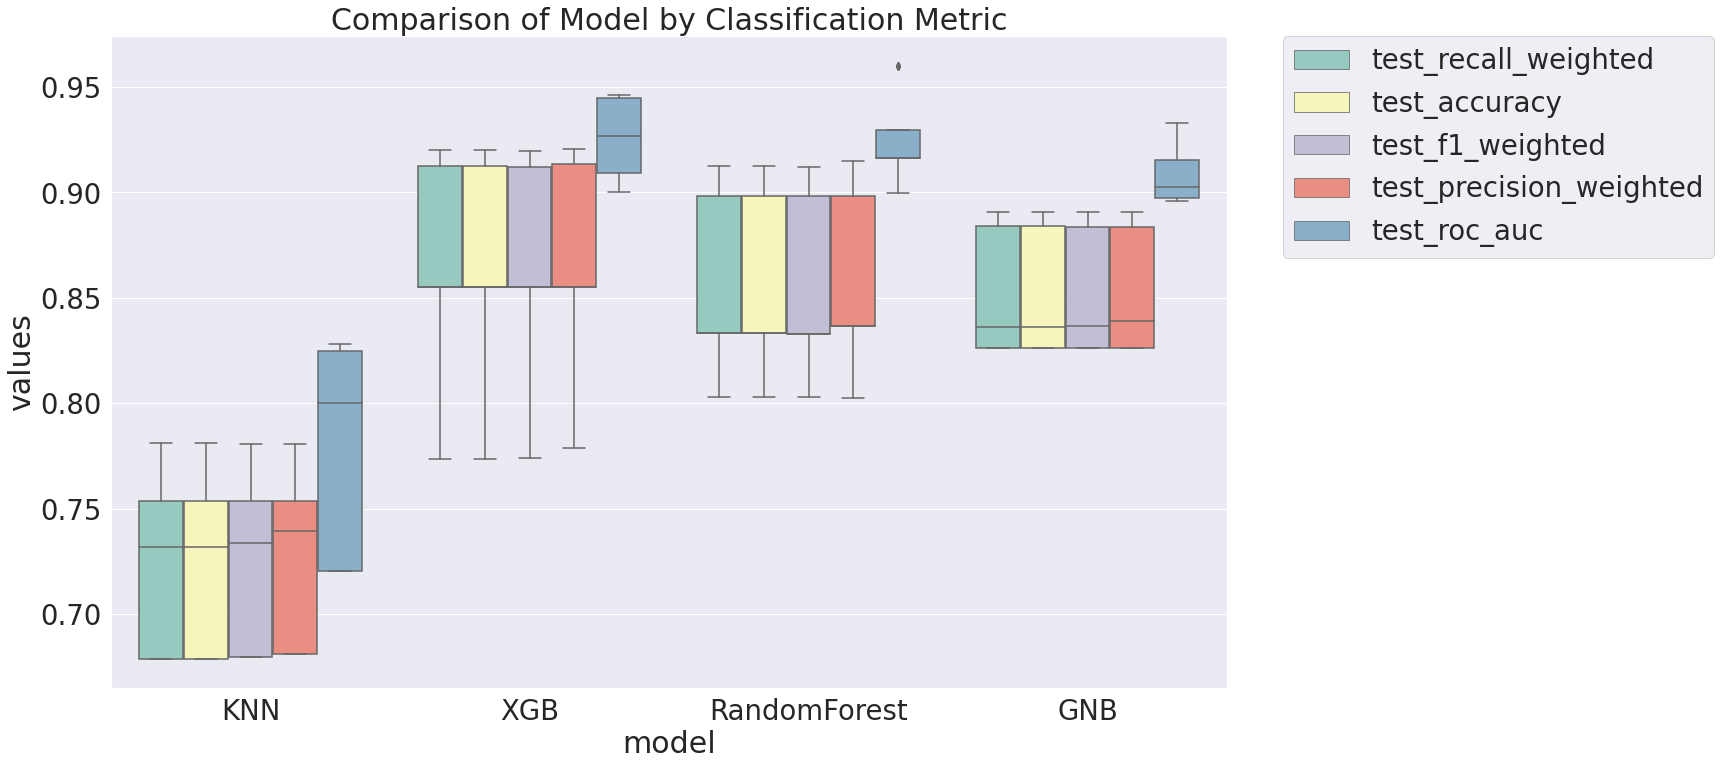

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)

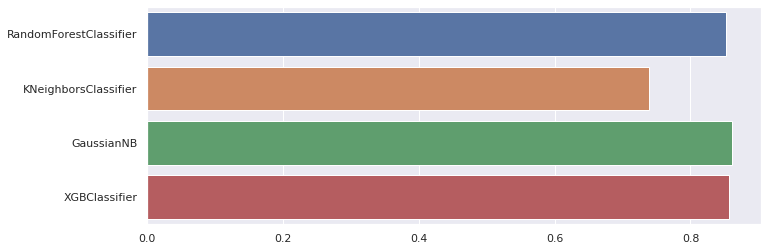

In [ ]:
models= [rfc, knn, gnb, xgb]
plotData = []
plotData1 = []

for model in models:
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)
    accuracy= accuracy_score(y_test, y_pred)
    plotData.append(accuracy)
    plotData1.append(type(model).__name__)

sns.set(rc={'figure.figsize':(11,4)})
sns.barplot(y=plotData1, x=plotData)
plt.show()

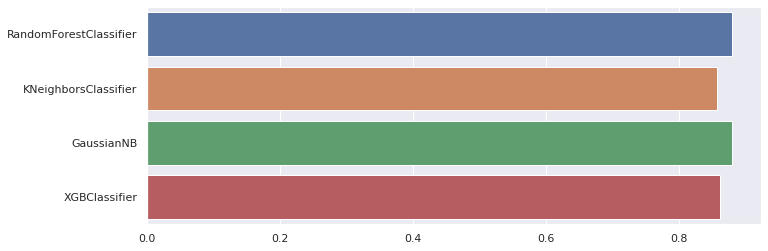

In [ ]:
models= [rfc_eda, knn_eda, gnb_eda, xgb_eda]
plotData = []
plotData1 = []

for model in models:
    model.fit(X_train_eda, y_train_eda)
    y_predi= model.predict(X_test_eda)
    accuracy= accuracy_score(y_test_eda, y_predi)
    plotData.append(accuracy)
    plotData1.append(type(model).__name__)

sns.set(rc={'figure.figsize':(11,4)})
sns.barplot(y=plotData1, x=plotData)
plt.show()